In [1]:
# importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data directly from github & checking the top 5 entries
data = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### encoding the sex column into 0 & 1 

In [3]:
# import the necessary class from sklearn
from sklearn.preprocessing import LabelEncoder

In [4]:
# doing fit_transform on original sex column and making a new column to dataset.
sex_new = LabelEncoder()
data['sex_enc'] = sex_new.fit_transform(data['Sex'])

In [5]:
# getting only inputs/features from data and saving in a new dataframe
inputs = data.drop(columns=['Survived','PassengerId','Name','Sex','Ticket','Cabin','Embarked'])

In [6]:
# defining the targets from data
targets = data.Survived

In [7]:
# checking the total information of inputs
inputs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pclass   891 non-null    int64  
 1   Age      714 non-null    float64
 2   SibSp    891 non-null    int64  
 3   Parch    891 non-null    int64  
 4   Fare     891 non-null    float64
 5   sex_enc  891 non-null    int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


In [8]:
# Age column is having some NaN/null values, so that needs to be addressed.
inputs.Age.isna().sum()

177

In [9]:
# getting the median Age
age_median = inputs.Age.median()
age_median

28.0

In [10]:
# filling the Null values in Age by median of age
inputs.Age.fillna(age_median,inplace=True)

In [11]:
# ensuring no null values for Age
inputs.Age.isna().sum()

0

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(inputs,targets,train_size=0.8)

In [14]:
x_train.shape

(712, 6)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
model.score(x_test,y_test)

0.8324022346368715

In [19]:
y_test.shape

(179,)

In [20]:
y_predicted = model.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[104,  13],
       [ 17,  45]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

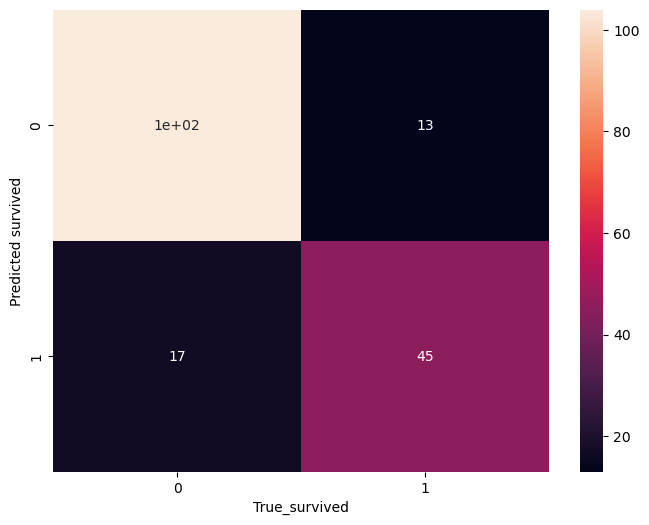

In [23]:
plt.figure(figsize = (8,6))
sns.heatmap(cm,annot=True,cmap='rocket')
plt.xlabel("True_survived")
plt.ylabel("Predicted survived")
plt.show